University of Michigan - ROB 101 Computational Linear Algebra

# Homework 8.  Solutions of Nonlinear Equations

## See our Canvas Page for the Due Date and Time!

#### Purpose: Find roots of functions!
- Skills
    - Using algorithms to iteratively construct approximate solutions
    - Passing functions to functions
    - Learn to use the Bisection and Newton's methods for root-finding
    - Using the Jacobian and Gradient in the Newton-Raphson Algorithm
- Knowledge
    - Creating functions that work on vector equations
    - Use linear approximations to find roots of functions
    
#### Task:
Complete and run the cells below as directed.

# Below we show how to write a safe While Loop, meaning one that will terminate in a finite number of loops. You just need to include a counter that sets an upper bound on the number of loops. In the beginning, be cautious and set kmax = 100 or something fairly small. Once things seems to be working, then you can up kmax to 1e5.

# If you turn in a notebook with a While Loop that does not terminate, we cannot grade the notebook. This is not a typo. We did not mean that we cannot grade that cell. The autograder will time out on the notebook and will not return a grade for any of the cells.

## If you see an [*] in a cell number for a long time, that means you have entered an infinite loop. It does not mean that Julia is just running slow! Instead, it means that you messed up. Don't worry, it happens to all of us. However,

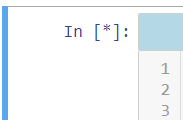

## you must manually terminate the cell by stopping your kernel. One way to do that is to hit the big black square next to the Run button

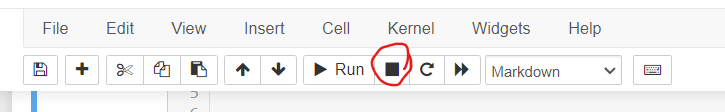

## Next, you will probably need to restart your kernel

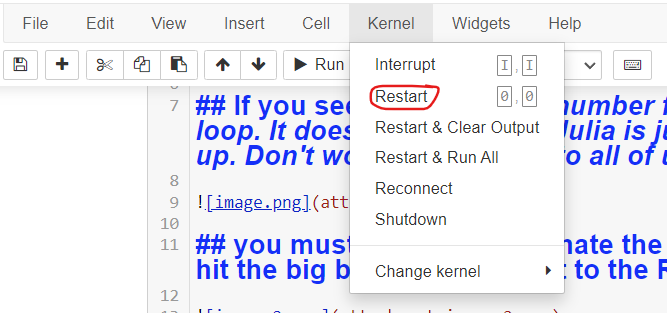

In [ ]:
# Example of how to make sure a while loop does not run forever

k=0; kmax = 1e2
tol = 1e-6 
myConvergenceCondition = 10
while (myConvergenceCondition > tol) && (k<kmax)
    myConvergenceCondition = myConvergenceCondition/1.1
    k=k+1
end
if (k>=kmax)&&(myConvergenceCondition > tol)
    println("The While Loop terminated prematurely with k = $k = kmax and myConvergenceCondition = $myConvergenceCondition ")
else
    println("The While Loop terminated with k = $k < kmax = $kmax and myConvergenceCondition = $myConvergenceCondition ")
end

In [ ]:
# You can also AVOID While Loops altogether

# Example of how to do the same thing with a For Loop
kmax = 1e2
tol = 1e-6 # 
myConvergenceCondition = 10
for k = 1:kmax # will terminate no later than k=kmax
    myConvergenceCondition = myConvergenceCondition/2
    if myConvergenceCondition < tol # when to leave the for loop
         println("The For Loop terminated correctly with k = $k and met the 
            criterion: myConvergenceCondition = $myConvergenceCondition < tol = $tol")
        break # will exit the for loop 
    end
end


### Problem 1.  Bisection for root finding (3 Points) 
### a)  Translate the pseudocode below into code, and use it to find the root of f(x) near x=-4.0 (1 point)
 $$ f(x) = 0.2x.^5 - 0.4(x-5).^3 + 0.7(x +2) - 100 $$

In [ ]:
# Run me don't change me
#f(x) is defined and plotted for you
f(x) = 0.2x.^5 - 0.4(x-5).^3 + 0.7(x +2) - 100
z(x) = 0
using Plots
p = plot(f, -5, 5)
plot!(z, -5, 5)

<img src = "https://i.postimg.cc/zB5TLDrQ/bisect-Pseudo.jpg" width = 700>

## Debugging hints
* Before running your algorithm for many steps (such as an infinite loop) run it for one (1) step to make sure that
    - c is computed correctly
    - f(c) is evaluated
    - If f(c)*f(a) < 0, then you updated b = c and kept a = a, else, a = c and b remains unchanged
    - to check these, use the @show command
    - If these values check out fine, then run your algorithm for a second step to make sure that f(c) is updated correctly, etc.
* Next, look at your termination condition. 
     - Note that you need an absolute value to check |f(c)| < aTol. Why? 
     - Because f(c) = -200 is less than any small positive number, but f(c) = -200 is not a root
* Include a counter k = k+1 and exit your code if k > kmax
    - Run a test with kmax = 2 to make sure your code does indeed exit. If it does not, stop your kernel.
* Actually look at the root being produced by your algorithm. Verify that f(root) is indeed a small number
* Next, check that the root is actually near the root you are looking for. If not, the likely cause is that you did not properly bracket the root when you chose your initial a and b.
    - If you pass one friendly test and fail another, you likely got lucky on the first check. 

## In the end, you should take pride in being able to diagnose problems with your code. Throwing up your hands and saying it doesn't work this deep into the term should be a last resort. 

In [ ]:
# You will build your bisection algorithm here
#
#Look at the graph, then choose a pair a < b range that bracket the root near -4
#Note that you need a < b and the product f(a)f(b) < 0
#
# Remark: Typically, you want to bracket a single root, but you can bracket
# multiple roots as long as a < b and f(a)f(b) < 0 BOTH hold
a = 
b = 
xRoot = NaN
#start a loop, compute c, f(c) and then update a or b accordingly.  
#If you find a zero (or approximate zero), store the root into xRoot, and exit the loop
c = (a+b)/2
fc = f(c)
# See the textbook (not Lab Manual) for a good example

# YOUR CODE HERE

#print out xRoot
[xRoot f(xRoot)]

In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong

is_it_correct_check1 = (abs(f(xRoot)) < 1e-8) ? "Yes" : "No"  

@show is_it_correct_check1;   

### b)  Create a bisection function from your code above. (1 point)
Your function should take in a function, the range values a and b, and a tolerance.

In [ ]:
function my_bisect(f, a, b, aTol=1e-12)
    xRoot = NaN
    #error checks: done for you
    if !(a < b)
        println("a is not strictly less than b")
        return xRoot 
    end
    if !( f(a)*f(b) < 0)
        println("Fails test provided by the Intermediate Value Theorem")
        return xRoot
    end
    if aTol < 1e-15
        println("tolerance is too tight")
        return xRoot
    end
    
    #Add code here from Prob 1a.  Also keep track of iterations this time
    k = 0  #use k to track iterations
    
    # YOUR CODE HERE
    
    println("iterated $k times and xRoot = $xRoot")
    return xRoot
end

In [ ]:
# Let's see what you get here
# If your answer is far from -3.9, it means you probably did not choose
# a and b correctly. You need to bracket the root near -4
# You can do some sanity checking on your own and not rely so much on us!
# 
xRoot1 = my_bisect(f, -4, -3, 1E-5)

In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong

xRoot1 = my_bisect(f, -4, -3, 1E-5)
is_it_correct_check1 = isapprox(xRoot1, -3.90153, atol=1e-5) ? "Yes" : "No"  

@show is_it_correct_check1;  

### c)  Use your function to find the other two roots (1 point)

In [ ]:
#output your answers as xRoot2 and xRoot3, in ascending order
#that is, xRoot2 < xRoot3
#
# YOUR CODE HERE

In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong

is_it_correct_check0 = (xRoot2 < xRoot3) ? "Yes" : "No" 
is_it_correct_check1 = (abs(f(xRoot2)) < 1e-8) ? "Yes" : "No"  
is_it_correct_check2 = (abs(f(xRoot3)) < 1e-8) ? "Yes" : "No"  

@show is_it_correct_check0;
@show is_it_correct_check1;  
@show is_it_correct_check2;  

## Problem 2: Modified Bisection (2 Points)

The bisection algorithm is super simple and quite reliable. It sequenctially divides the bracketing region $[a~~ b]$ by half by defining $c=(a+b)/2$, and only uses the function values at $f(a)$ and $f(c)$ to determine which of the two ends of the bracket is to be updated. Newton's algorithm, on the other hand, uses additional information: the "slope" of the function at $c$,  to update the next estimate of the root: $$x_{k+1} = x_{k}-h \frac{df(x_k)}{dx}$$ 

What we will do now is modify the Bisection Algorithm so that it too uses slope information. 

In [ ]:
# Run me, don't change me.
# I make an image to show how the algorithm works
using Plots
temp(x)=x^3 +x - 1
xline(x)=0
a=-2;b=2
pedagog=plot(temp,a,b, linewidht=2, legend=false)
plot!(xline, a, b, linewidth=3, color=:black)
m=(temp(b)-temp(a))/(b-a)
c=a-temp(a)/m
line(x)=temp(a) + m*(x-a)
xlabel!("x")
ylabel!("f(x)")
plot!(line,a,b, linewidth=3, color=:red)
scatter!([c],[0],markersize=6,color=:blue)
scatter!([a; b],[temp(a); temp(b)],markersize=4,color=:black, series_annotations = text.(["f(a)" ;"f(b)"], :bottom) )
display(pedagog)

A picture of how the algorthm works is shown above.  The blue line is a function f(x). We connect the point $[a, f(a)]$ with the point $[b, f(b)]$ with a straight line (red). The line is defined by
$$ y(x)= f(a) + m (x-a), $$
where the slope is $m = \frac{f(b)-f(a)}{b-a}$.
We then solve for the intersection of the line with the $x$-axis, to find $c$, so that $c=a - f(a)/m$. The decision on whether to update $a$ or $b$ is still made based on whether $f(a)$ and $f(c)$ are of the same or different signs.  

### Write the modified bisection function: Your function should take in a function, a and b values that bracket the desired root, and a tolerance.

#### Hint: Your code from the bisection algorithm is a great start on building this function

#### Hint: A common mistake is not to update $m = \frac{f(b)-f(a)}{b-a}$ at each pass of the algorithm

#### Hint: You have to change how you compute c to use $c=a - f(a)/m$. The update logic for a and b remains the same and is based on f(c)*f(a) < 0 or not, and your termination logic remains the same. 

In [ ]:
function mod_bisect(f, a, b, aTol=1e-12)  
    #you can reuse your code from the regular bisection algorithm, just be sure to change the computation of c
    
    # YOUR CODE HERE
end

In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong

@show xRootb1 = mod_bisect(f, -4, -3, 1E-9)
@show xRootb2 = mod_bisect(f, -2, 0, 1E-9)
@show xRootb3 = mod_bisect(f, 2, 4, 1E-9)

is_it_correct_check1 = (abs(f(xRootb1)) < 1e-8) ? "Yes" : "No"  
is_it_correct_check2 = (abs(f(xRootb2)) < 1e-8) ? "Yes" : "No"  
is_it_correct_check3 = (abs(f(xRootb3)) < 1e-8) ? "Yes" : "No" 

@show is_it_correct_check1;  
@show is_it_correct_check2;
@show is_it_correct_check3; 

## Problem 3: Newton's Algorithm (2 Points)
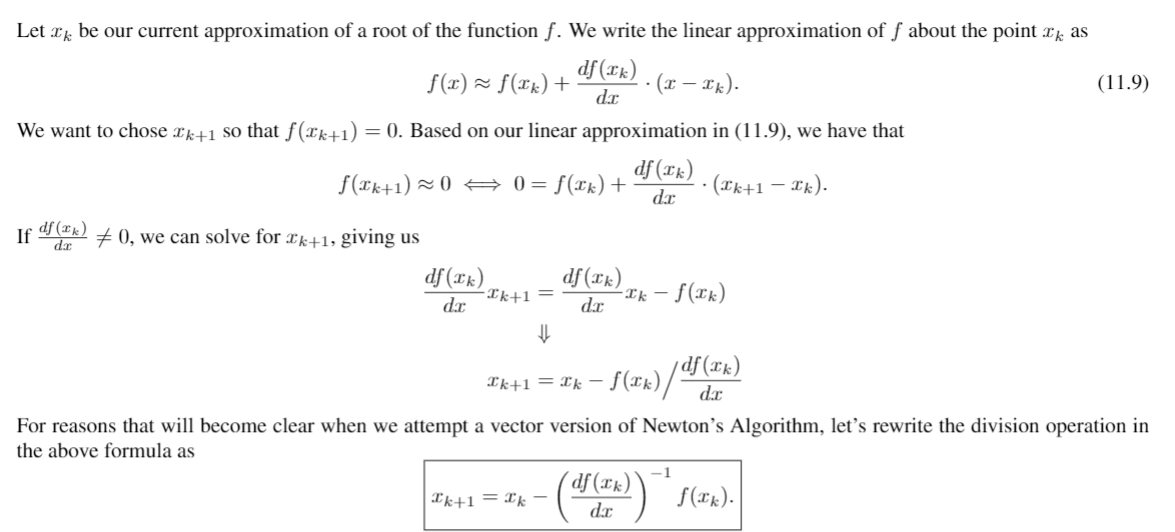

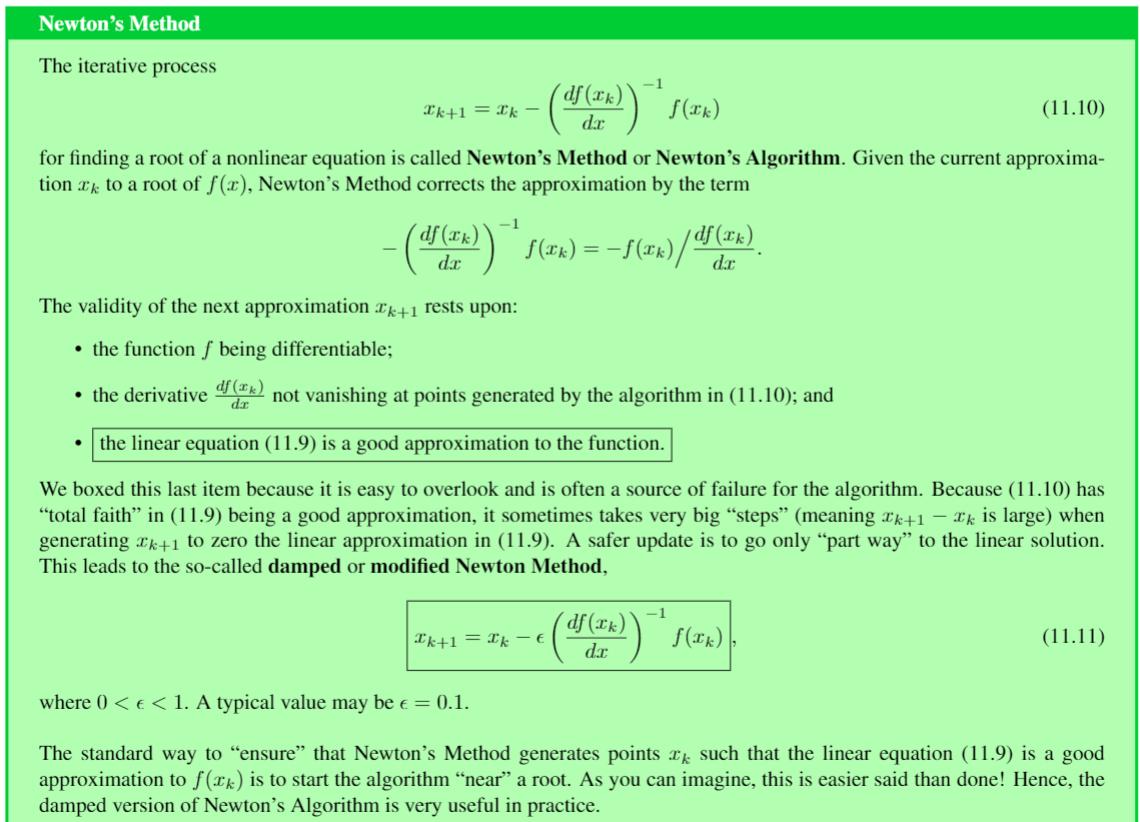

Write Newton's Algorithm as a function. 
Your Function should take in:
- a function to work on
- an estimate of the solution
- an h value 
- a character that indicates symmetric, forward or backward ('s', 'f', or 'b')
- a tolerance

A reminder on Forward, Backward and Symmetric Difference:
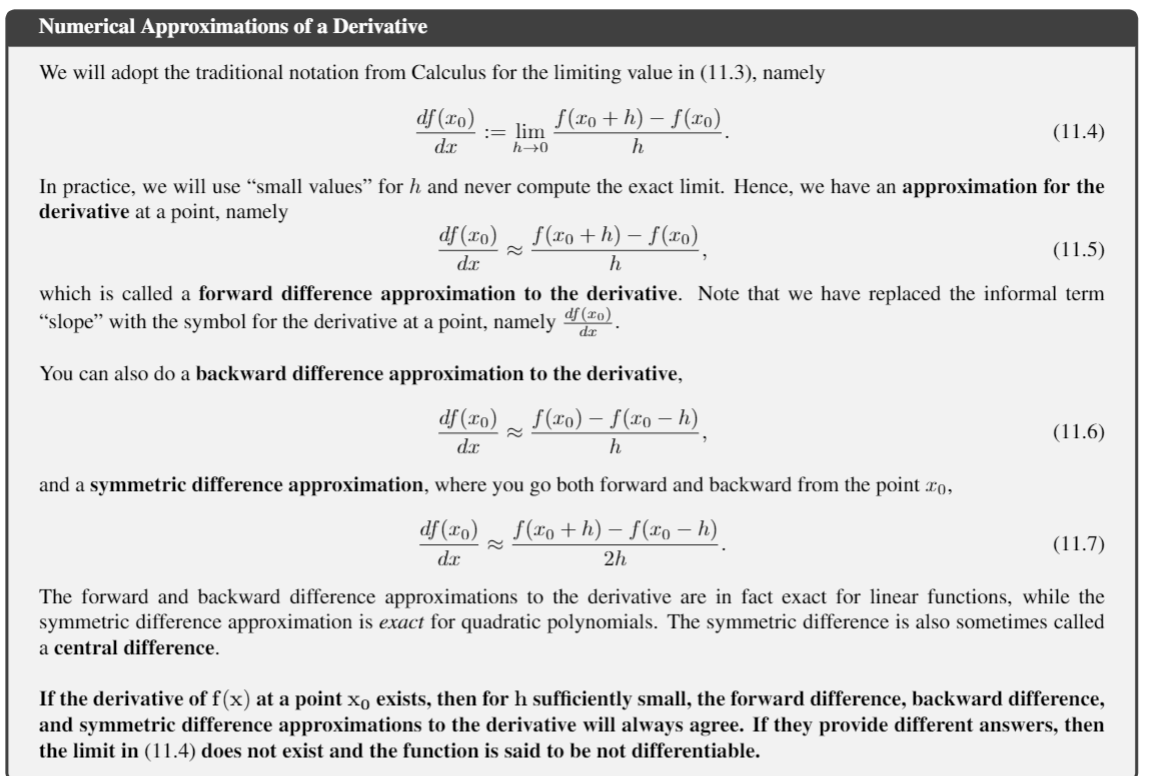

In [ ]:
#Build the function in this cell
function newtons_algorithm(f, x0, h, diffType, aTol=1e-12)
    k = 0; #keeps track of iterations
    x = x0;
    while (abs(f(x))>aTol) && (k<1E4)
        #first, compute df depending on which type of difference was indicated
        
        # YOUR CODE HERE
        
        @show x = x - f(x)/df
        
        k += 1
    end
    println("Iterated $k times")
    return x
end

In [ ]:
#A reminder of what function you are working on (so you don't have to scroll up)
f(x) = .2x.^5 - .4(x-5).^3 + .7(x +2) - 100

In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong

ans3a = newtons_algorithm(f, -3.8, 1E-3,'s',1E-9)

is_it_correct_check1 = (abs(f(ans3a)) < 1e-8) ? "Yes" : "No"  

@show is_it_correct_check1;    

### The Newton-Raphson Algorithm

The algorithms you just wrote unfortunately only work for single-variable equations. In an equation with multiple independent variables, there are many "slopes" between two points, because there are multiple dimensions along which to compute the slopes. Consider a function $f:R^2 \to R^2$, where 
$$ \begin{bmatrix}z_1 \\ z_2 \end{bmatrix} = \begin{bmatrix}f_1(x,y) \\ f_2(x,y) \end{bmatrix}:=\begin{bmatrix}ax + by \\ cx + dy \end{bmatrix}$$
There are now two independent rates of change: the change in $z_1$ with respect to x, and the change in $z_1$ with respect to y. But wait, there's more! You can't find the roots with $f_1$ alone, the places where $z_1$ is 0, because now you have 2 independent variables! We also need to use $f_2$ and compute the change in $z_2$ with respect to x, and the change in $z_2$ with respect to y.  

To do this, we need a new tool to define the rates of change (derivatives) of a vector-valued function, and a new algortihm to use those derivatives to find the roots. And so, we have the Jacobian and the Newton-Raphson Algorithm.

### Problem 4: The Jacobian of a function (4 Points)
The Jacobian of a function f(x) is computed as follows:
$$\mathbf J = \begin{bmatrix}
    \dfrac{\partial \mathbf{f}}{\partial x_1} & \cdots & \dfrac{\partial \mathbf{f}}{\partial x_n} \end{bmatrix}
= \begin{bmatrix}
    \dfrac{\partial f_1}{\partial x_1} & \cdots & \dfrac{\partial f_1}{\partial x_n}\\
    \vdots & \ddots & \vdots\\
    \dfrac{\partial f_m}{\partial x_1} & \cdots & \dfrac{\partial f_m}{\partial x_n} \end{bmatrix}$$
    
#### Below is an example from our textbook of how the Jacobian is calculated with the symmetric difference method

In [ ]:
F(x1,x2,x3)=[x1*x2*x3; log(2+cos(x1)) + x2^x1; x1*x3/(1 + x2^2)]
h=0.01
x0=[pi;1.0;2.0]
dfdx1 =(F(x0[1]+h,x0[2],x0[3])-F(x0[1]-h,x0[2],x0[3]))/(2*h)
dfdx2 =(F(x0[1],x0[2]+h,x0[3])-F(x0[1],x0[2]-h,x0[3]))/(2*h)
dfdx3 =(F(x0[1],x0[2],x0[3]+h)-F(x0[1],x0[2],x0[3]-h))/(2*h)
dfdx_Ans=[dfdx1 dfdx2 dfdx3]

### a)  Rewrite the function F in vector form (1 point)
### Convert F(x1, x2, x3) into the form Fvect(x)  where x is a vector $\left[x1, x2, x3\right]$



### Hint 1:  to access x1, you would need to index into x with $x[1]$
  
### Hint 2: suppose g(x1,x2)=x1^2 * sin(x2), then we can vectorize the function via Gvect(x)=x[1]^2 * sin(x[2])

### Hint 3: here is another way, which you may like better

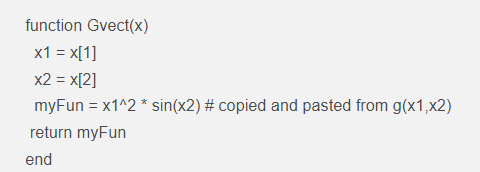

### Hint 4: Note the function name on the left has x in it, while the function's definition on the right accesses the components of x. 

### Hint 5:  Gvect(x)=x1^2*sin(x2) is WRONG because Julia has no idea that x1 and x2 are related to x. You need to index into the components of x, as in x[1], x[2], etc. 

In [ ]:
# Two ways to vectorize a function
# g(x1,x2)=x1^2 * sin(x2)
function Gvect01(x)
  x1 = x[1]
  x2 = x[2]
  myFun = x1^2 * sin(x2) # copied and pasted from g(x1,x2)  
  return myFun
end

Gvect02(x) = x[1]^2 * sin(x[2])

x = [1 2]
@show Gvect01(x) # Easy to use
@show Gvect02(x) # Easy to use
#
g(x1,x2)=x1^2 * sin(x2) # not vectorized
@show g(x[1],x[2]); # Is harder to call with x a vector

In [ ]:
#rewrite function F from above in vector form.  Call it Fvect
# YOUR CODE HERE

In [ ]:
#autograder cell
using Random
Random.seed!(142)
x = 10*randn(3)
x1 = x[1]; x2 = x[2]; x3 = x[3];
@show regF = F(x1, x2, x3)
@show vectF = Fvect(x)

### b)  Write a function that uses symmetric differences to compute the Jacobian for a square function of n terms (1 point)
Your function should take in:
- a function of n-terms (written in vector form)
- an h value
- a point on the surface at which to compute the Jacobian

And should return:
- an  n x n Jacobian matrix

**Hint:** Our previous example calulates each column of dfdx one at a time, as in the first row of equation (11.23) below.  The second row of equation (11.23) shows you how to compute the j=th column of the Jacobian matrix when you function accepts vector arguments. The third row of equation (11.23) can be ignored here...it is showing that a partial derivative is really an ordinary derivative with respect a single variable, namely, xj, while all other variables are held constant.


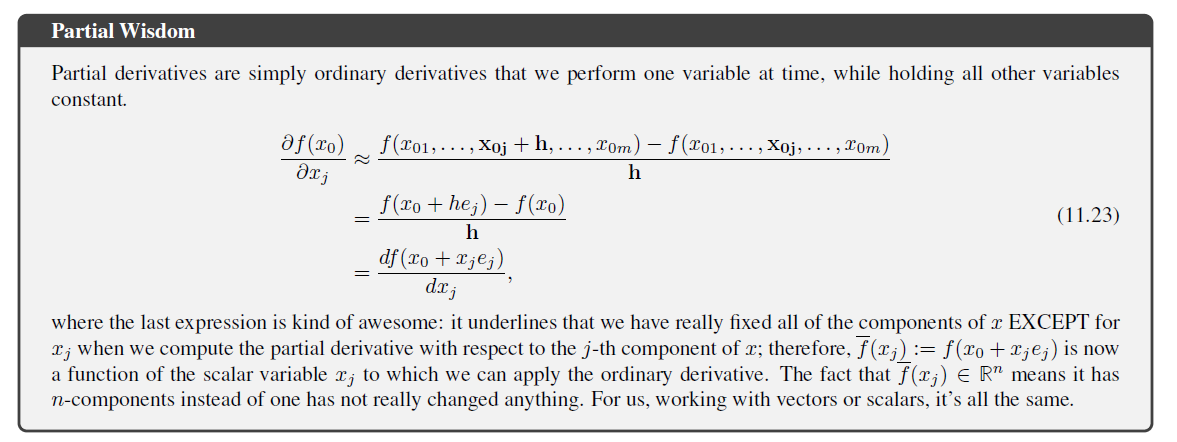



In [ ]:
# How to create the natural basis vectors
using LinearAlgebra
n=4
Id = zeros(n,n)+I # To use I you must have run:  using LinearAlgebra
for j = 1:n
    ej = Id[:,j]
    display(ej) # just here so you can see the vectors
                # In your Jacobian function, do not print these out
end

In [ ]:
function my_jacobian(F, h, x0)
    #assume that x0 and F are size compatible
    m = length(x0)
    n = length(F(x0))
    dfdx = Array{Float64}(undef, n, m)  #blank array of the correct size
    Id = zeros(m,m)+I
    for j in 1:m
        #compute and store each column of dfdx.  
        # YOUR CODE HERE      
    end
    return dfdx
end

In [ ]:
ans4b = my_jacobian(Fvect, 0.01, [pi;1.0;2.0])
@show ans4b
#check that your output from this cell is the same as from the example cell

### c)  Use your Jacobian function to find the Jacobian of g(a, b, c, d, x, y, z)  (2 points)

 $$ g(a, b, c, d, x, y, z) =  \left[ \begin{array}\ a^2 - 6bz + cx^3 +a - d\\ abc + xd^2\\ a^3 - 2b + c\\ ab^2 - ba^2\\ b^3 + 4c + xad + 2y\\a^4\\ dc^2 - 3a -b\end{array} \right]$$
 
 
Compute the Jacobian matrix when **a = 1, b = pi, c = -2, d = 0.8, x = -pi, y = -0.9, z = 4**

In [ ]:
#first, you must declare your function g() in vector form
#enclose the entire thing in square braces[] and separate rows with semicolons ;
# It will be easier to debug if you put each row on a separate line

# g(v) = ??

In [ ]:
# Friendly check to see if your function g is OK or not
# If you named your function something other than g, then the
# test will fail
#
xTest1 = [1; 2; 3; 4; 5; 6; 7]
gAns1  = [289; 86; 0; 2; 52; 1; 31]
eTest1 = gAns1-g(xTest1) # <---name of your function
indicesError1=findall(x->x>0.01, abs.(eTest1))
if length(indicesError1) > 0
    println("Test 1 found errors in rows $indicesError1 of your function g")
else
     println("Test 1 found no errors in your function g")
end
#
xTest2 = [10;1;10;1;10;1;10]
gAns2 = [10049;  110;  1008;  -90;  143;  10000;  69]
eTest2 = gAns2-g(xTest2) # <---name of your function
indicesError2=findall(x->x>0.01, abs.(eTest2))
if length(indicesError2) > 0
    println("Test 2 found errors in rows $indicesError2 of your function g")
else 
    println("Test 2 found no errors in your function g")
end

In [ ]:
#now compute the Jacobian at the designated point
#Use a step size of 1E-3

#declare your point first, such as x0
#store the Jacobian at x0 in the variable ans4d
# x0 = ??
# ans4d = ??

In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong 

is_it_correct_check1 = isapprox(sum(ans4d), -98.17809, atol = 1e-3) 

if is_it_correct_check1 
    println("Yes!")
else 
    println(" No! If you failed this test on your Jacobian but passed the previous test,")
    println(" you should suspect that you made a mistake when creating the function g.")
    println(" You should also double-check your Jacobian against an example from the ROB 101 textbook.")
end

### Problem 5: Newton-Raphson Algorithm with the Jacobian (4 Points)
Essentially, the Newton-Raphson method is a vector version of Newton's Algorithm.
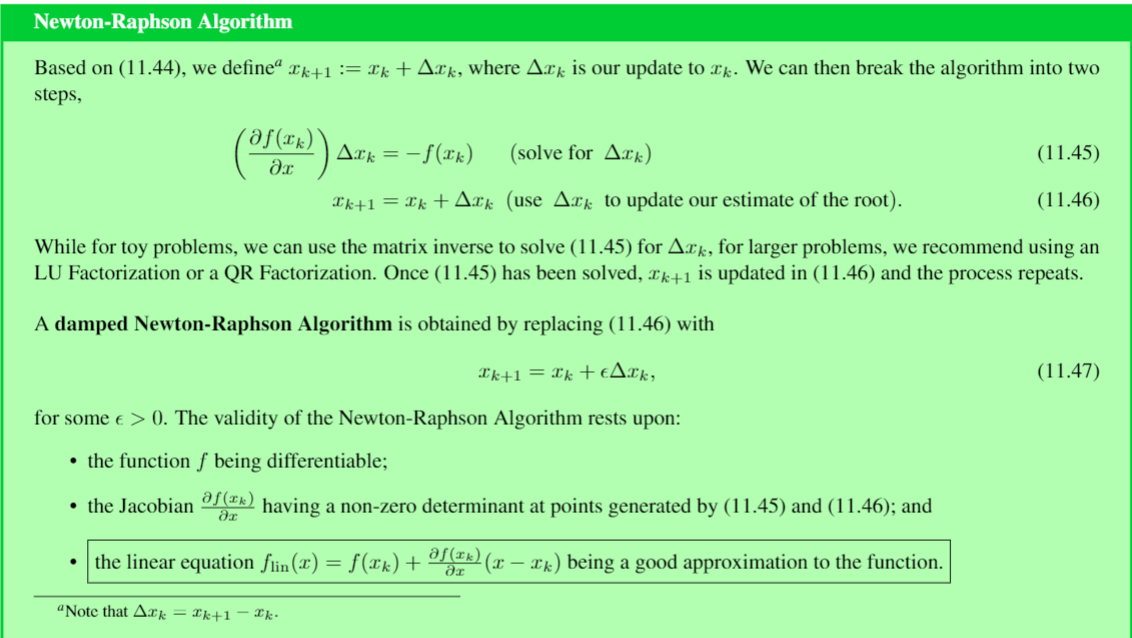

### a)  Build a Newton-Raphson function 
Your function should take in:
- a function
- an estimate of the root/solution
- a step size
- a tolerance

You may use either an LU or QR factorization to solve for $\Delta x_k$ in (11.45). Both are built into the Linear Algebra package.  Forward and back substitution functions are provided.

### Remark on using the native QR function in Julia
Q, R =qr(A) # where the command qr is lower case

### If you use F = qr(A), and then Q=F.Q, R = F.R you will have problems



In [ ]:
##Forward and Back substitution functions from HW04

#This is a back substitution function.  It solves for x in an equation Ux = b, where U is upper triangular.
function backwardsub(U, b)
    n = length(b)
    x = Vector{Float64}(undef, n) 
    x[n] = b[n]/U[n,n]
    for i in n-1:-1:1
        x[i]=(b[i]- (U[i,(i+1):n])' *x[(i+1):n] )/U[i,i]
    end
    return x
end
#This is a forward substitution function
function forwardsub(L, b)
    n = length(b)
    x = Vector{Float64}(undef, n); 
    x[1] = b[1]/L[1,1] 
    for i = 2:n 
        x[i]=(b[i]- (L[i,1:i-1])' *x[1:i-1] )/L[i,i] 
    end
    return x
end

In [ ]:
using LinearAlgebra
function newton_raphson(F, x0, h, tol)
    #fill in the function!  Return the root from your function
    #be sure to also keep track of the iterations it took for the root to converge
    #Hint:  Look to earlier functions for structuring help
    
    # YOUR CODE HERE
    
end
# There is nothing to check on part a)

## b)  Run your Newton-Raphson function on r(x).  Choose an appropriate x0 so that you don't get "NaN" values (2 points)
With Newton's method for single variable functions, you could look at a graph to make your estimate.  However, when faced with a vector valued function or a function beyond 3 dimensions, visualization with plots is difficult or impossible.  You must choose your estimates without the visual aid.

#### Hint:  You can either guess and check here, or you can estimate a root to r(x) by hand with algebra.

In [ ]:
#r is declared for you
r(x) = [x[1]^3 + 4*x[2]^2 - 3; 3*x[2] - x[1]^2 + 2]

In [ ]:
# first choose your estimate of the root, then solve for the root
# return your answer as ans5b

# xZero = ??
# ans5b = ??

In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong 

is_it_correct_check1 = isapprox(sum(r(ans5b)), 0, atol = 1e-6)   

if is_it_correct_check1 
    println("Yes. Feeling good!")
else 
    println(" No, bummer! If you failed this test, first check your aTol for terminating your loop.")
    println(" Next, try the function r(x) = [(x[1] - pi)^2; (x[2] - 3.0)^2], which has roots at x1=pi and x2=3")
    println(" You can also double-check your function against an example from the ROB 101 textbook.")
end

### c)  Run Newton-Raphson on this example problem from your textbook.  Then, try changing the tolerance and the starting point.  (2 points)
$$F(x)=\left[\begin{array}{c}
   x_1 + 2 x_2 - x_1 (x_1 + 4 x_2) - x_2 (4 x_1 + 10 x_2) + 3  \\
 3 x_1 + 4 x_2 - x_1 (x_1 + 4 x_2) - x_2 (4 x_1 + 10 x_2) + 4  \\
                                0.5 \cos(x_1) + x_3 -\left( \sin(x_3) \right)^7  \\
                              -  2(x_2)^2  \sin(x_1) + (x_4)^3
\end{array} \right]
$$


In [ ]:
# The function is declared for you!  Thank you!!
fTest(x) = [(x[1] + 2x[2] - x[1]*(x[1]+4x[2]) - x[2]*(4x[1]+10x[2]) +3);
            (3x[1] + 4x[2] - x[1]*(x[1]+4x[2]) - x[2]*(4x[1]+10x[2]) +4);
            (0.5cos(x[1]) + x[3] - (sin(x[3])).^7);
            (-2(x[2]^2)*sin(x[1]) + x[4]^3)]

In [ ]:
# This should produce the same results as Example 11.9 in our textbook, after rounding the values
x0 = [-2, 3, pi, -1]
myTol = 1E-3
textbookEx = newton_raphson(fTest, x0, 0.1, myTol)

In [ ]:
# friendly check
# if the value of is_it_correct_checkN is "Yes", then your answer may be correct. 
# If the value of is_it_correct_checkN is "No", then your answer is wrong 

is_it_correct_check1 = isapprox(textbookEx, [-2.2595730873836666; 1.7595730873836664; 0.31808933111096444; -1.6845807137029898], atol=1e-3) ? "Yes" : "No"  

@show is_it_correct_check1;